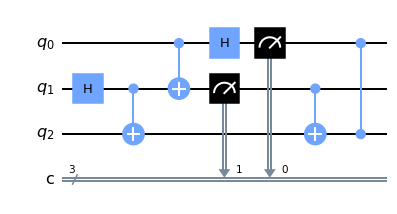

In [1]:
#importando as bibliotecas do qiskit
from qiskit import*
from numpy import pi
#declarando meus bits quânticos e registros clássicos
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)
#construindo meu circuito com os portões necessários para o teletransporte
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cz(qreg_q[0], qreg_q[2])

#desenhar circuito 
circuit.draw(output='mpl')

In [2]:
#Abrindo meu simulador de computação quântica
simulator = Aer.get_backend('qasm_simulator')

In [3]:
#Armazenando meu resultado
result = execute(circuit, backend=simulator).result()

In [4]:
#Importando visualização de histograma
from qiskit.visualization import plot_histogram

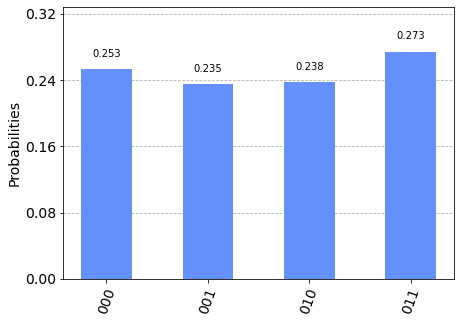

In [5]:
#Gerando o gráfico do histograma
plot_histogram(result.get_counts(circuit))

In [6]:
#Abrindo meu computador quântico real
IBMQ.load_account()
provider = IBMQ.get_provider(hub ='ibm-q')

In [7]:
#declarando a quântidade de qubits necessária para a execução do programa
num_qubits = 3
#declarando qual computador quântico da ibm será usado
qcomp = provider.get_backend('ibmq_lima')
print(qcomp)

ibmq_lima


In [8]:
#importação de biblioteca Jupyter
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [9]:
#executando o programa em um computador quântico real
job = execute(circuit, backend=qcomp)

In [10]:
#armazenando o resultado
result=job.result()

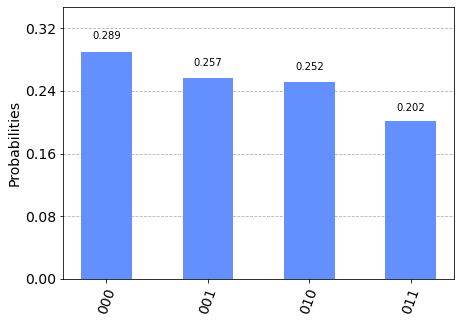

In [11]:
#gerando o gráfico do histograma do computador quântico real
plot_histogram(result.get_counts(circuit))
#os termos com 1 na frente são devidos ao erro de computadores quânticos reais, iremos ver como 
#mitigar esses erros no futuro. 